## Background

* Met the team behind this very interesting project on October 17.
* Got their laboriously collected sample dataset that night.
* Started playing with it October 26.
* The data is an anonymized set of records of trash pickups from a set of sweeps that ran every two or three days for two weeks.
* The test area was Polk Street, between Broadway and Filbert.
* Area is mixture of commercial and residential.
* On the order of 20,000 individual pieces of trash were picked up.
* Team challenge is to communicate the value of their project through data visualization and high quality data story content.
* They have a lot of very interesting stories and need help telling them, both with and without data.
* First let's take a run at the data.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel("../data/one-month-data.xlsx")

In [3]:
df.head()

,itemsTagged,likes,street,type,time,userPrimaryCommunityName,userCity,userCityDistrict,userState,userZipCode,lat,long,totalNumberOfItemsTagged,pickedUp
0,1,0,Filbert St,tobacco,"9/18/2018, 12:45:07 AM",Russian Hill,San Francisco,San Francisco County,California,94109,37.799602,-122.422209,1,True
1,1,0,Filbert St,other,"9/18/2018, 12:45:05 AM",Russian Hill,San Francisco,San Francisco County,California,94109,37.799808,-122.422168,1,True
2,1,0,Filbert St,other,"9/18/2018, 12:45:04 AM",Russian Hill,San Francisco,San Francisco County,California,94109,37.799744,-122.422153,1,True
3,1,0,Filbert St,other,"9/18/2018, 12:45:03 AM",Russian Hill,San Francisco,San Francisco County,California,94109,37.799807,-122.422091,1,True
4,1,0,Polk St,tobacco,"9/18/2018, 12:42:13 AM",Russian Hill,San Francisco,San Francisco County,California,94109,37.799505,-122.422302,1,True


In [9]:
df.shape

(17386, 14)

In [10]:
df['pickedUp'].value_counts()

True     13188
False     4198
Name: pickedUp, dtype: int64

In [11]:
df['type'].value_counts()

tobacco        8289
paper          4968
other          3184
bottlesCans     507
food            306
glass           132
Name: type, dtype: int64

In [13]:
df['street'].value_counts().head()

Polk St       12001
Union St        817
Vallejo St      672
Green St        638
Geary St        364
Name: street, dtype: int64

* Some initial forays by the team: [one](https://www.reddit.com/r/dataisbeautiful/comments/9p0slr/update_one_month_of_litter_on_polk_broadway_san/e7yazks/) and [two](https://www.reddit.com/r/dataisbeautiful/comments/9lc2ir/tobacco_litter_picked_up_on_polk_street_sf_over/).
* I made some sketches on paper of what the visualizations would look like.
* Technology choices. I want to be able to do static visualizations in Python. If needed I can code up more advanced tech in D3.JS or Carto or Mapbox. But static visualizations and focus areas are the right place to start.
* I need a data source for street centerlines.
* I need a data source for building footprints.
* Let's find them!

In [14]:
import geopandas as gpd
gdf = gpd.read_file("/Users/alex/Downloads/sf05c.dwg")

CPLE_NotSupportedError: b'libopencad 0.3.2 does not support this version of CAD file.\nSupported formats are:\nDWG R2000 [ACAD1015]\n'

* This is [this dataset](https://data.sfgov.org/Geographic-Locations-and-Boundaries/CCSF-Digital-Basemap-CAD-Files/uh8r-b96p), which leads to boundary files (?) distributed using the `dwg` format.
* `dwg` is the mainstay proprietary AutoCAD format. They have fought like hell, mostly unsuccessfully, legally to keep it out of the hands of anyone else. You know, because they're evil.
* Each year they release a new undocumented revision of the file format.
* It appears to `geopandas` supports DWG, but not this particular form of DWG.
* Opening the file in a text editor and following the instructions [here](https://knowledge.autodesk.com/support/autocad/learn-explore/caas/sfdcarticles/sfdcarticles/How-to-find-which-version-of-AutoCAD-was-used-to-create-save-a-DWG.html) show that this is a 2004 format file, so it makes a bit of sense we can't read it in Python. But, wow.


* Probably what I actually need: https://data.sfgov.org/Housing-and-Buildings/Building-Footprints-File-Geodatabase-Format-/asx6-3trm
* A

In [15]:
!mv /Users/alex/Downloads/San_Francisco_Bldg_withZ_20161028.zip ../data/building_footprints.zip

In [16]:
from zipfile import ZipFile

z = ZipFile("../data/building_footprints.zip")

In [18]:
z.filelist

[<ZipInfo filename='SF_BldgFoot_2016-10_description.pdf' compress_type=deflate external_attr=0x20 file_size=1639582 compress_size=1374384>,
 <ZipInfo filename='SF_Bldg_201610.gdb.zip' compress_type=deflate external_attr=0x20 file_size=378278891 compress_size=376874614>]

In [20]:
z.extract('SF_Bldg_201610.gdb.zip', path='../data/')

'../data/SF_Bldg_201610.gdb.zip'

In [74]:
gdf = gpd.read_file("../data/SF_Bldg_201610.gdb.zip")

In [37]:
gdf.shape

(177023, 43)

In [38]:
gdf.head()

,sf16_BldgID,Area_ID,sf_MBLR,P2010mass_Z_MinN88ft,P2010mass_Z_MaxN88ft,gnd_cells50cm,gnd_MINcm,gnd_MAXcm,gnd_RANGEcm,gnd_MEANcm,...,hgt_MINORITYcm,hgt_MEDIANcm,gnd_Min_m,Median_1st_m,hgt_Median_m,gnd1st_delta_m,peak_1st_m,Shape_Length,Shape_Area,geometry
0,201006.0000001,1,SF4570025,16.3249,66.2671,178250,507,704,197,595.642771,...,349,850,5.07,14.16,8.50,9.09,23.85,888.193938,44560.769721,(POLYGON Z ((54214.86980000045 22869.608100000...
1,201006.0000002,2,SM005050270,81.7802,214.1874,144111,2515,3419,904,3015.755862,...,11,735,25.15,39.25,7.35,14.10,66.94,1588.195449,36023.726253,(POLYGON Z ((50739.79220000003 19299.196799999...
2,201006.0000003,3,SF3794028,12.5027,102.5737,115295,164,507,343,397.214164,...,-86,1157,1.64,15.29,11.57,13.65,59.18,1568.404996,28821.622762,(POLYGON Z ((53390.88200000022 27246.115299999...
3,201006.0000004,4,SF7295021,NaN,NaN,107634,4346,5185,839,4923.524778,...,16,1153,43.46,61.58,11.53,18.12,69.72,1063.512759,26902.836760,(POLYGON Z ((45590.12100000028 21658.142799999...
4,201006.0000005,5,SF9900015,9.1163,57.9121,102761,81,422,341,196.438970,...,19,990,0.81,11.51,9.90,10.70,19.26,1243.873444,25689.995481,(POLYGON Z ((52680.96789999958 29844.480000000...


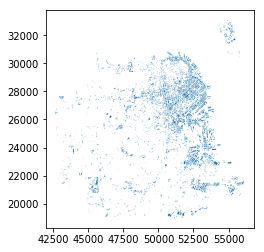

In [41]:
gdf.head(5000).plot()

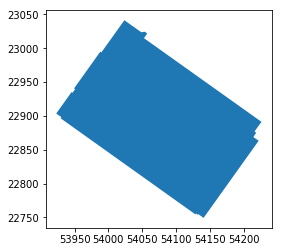

In [42]:
gdf.head(1).plot()

Perfect!

In [45]:
from shapely.geometry import Polygon

# gdf.head(5).intersects(Polygon())

In [109]:
from shapely.geometry import Polygon

def extent(cx, cy, lx, ly):
    """
    Returns a shapely.geometry.Polygon object with the given (cx, cy) center coordinate, 
    length 2 * lx, and width 2 * ly."""
    return Polygon(((cx - lx, cy - ly), (cx - lx, cy + ly), (cx + lx, cy + ly), (cx + lx, cy - ly)))

In [75]:
gdf.crs

{'init': 'epsg:7131'}

* The coordinate system is a special-purpose one that was defined by the City of San Francisco. It's up on the registry [here](http://epsg.io/7131).

In [78]:
gdf = gdf.to_crs({'init': 'epsg:4326'})

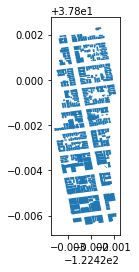

In [111]:
gdf[gdf.intersects(extent(-122.422222, 37.797917, 0.001, 0.004))].plot()

In [251]:
def select(gdf, cx, cy, lx, ly):
    ext = extent(cx, cy, lx, ly)
    ext = ext.buffer(max(lx, ly) * 0.5)
    sel = gdf[gdf.intersects(ext)]
    
    return sel

In [252]:
sel = select(gdf, -122.422222, 37.797917, 0.001, 0.004)

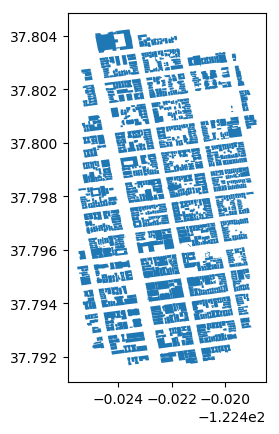

In [253]:
sel.plot()

In [159]:
len(sel)

1238

In [125]:
len(sel)

327

In [180]:
def get_extent(cx, cy, lx, ly):
    return (cx - lx, cx + lx, cy - lx, cy + ly)

In [160]:
import geoplot as gplt

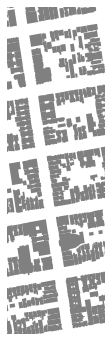

In [182]:
gplt.polyplot(sel, projection=gplt.crs.AlbersEqualArea(), facecolor='gray', 
              linewidth=0, extent=get_extent(-122.422222, 37.797917, 0.001, 0.004))
# linewidth=0, edgecolor='white', 

* The buildings paint a useful picture of the cityscape. But we need a bunch more layers to do useful things.
* First of all, road centers.
* These live here: https://data.sfgov.org/Geographic-Locations-and-Boundaries/San-Francisco-Basemap-Street-Centerlines/7hfy-8sz8.

In [193]:
!cp "/Users/alex/Downloads/San Francisco Basemap Street Centerlines.geojson" "/Users/alex/Desktop/trash-talk/data/sf-street-centerlines.geojson"

In [194]:
roads = gpd.read_file("../data/sf-street-centerlines.geojson")

In [195]:
roads.head()

,zip_code,f_node_cnn,classcode,accepted,jurisdicti,street_gc,cnn,layer,nhood,st_type,...,cnntext,lf_fadd,t_node_cnn,multigeom,street,district,lf_toadd,oneway,rt_toadd,geometry
0,94114,26132000,0,N,None,CROWN,15145000.0,PRIVATE,Twin Peaks,CT,...,15145000,0.0,54223000,false,CROWN,None,0.0,B,0.0,LINESTRING (-122.4469424451799 37.757228921523...
1,94114,26255000,0,Y,DPW,SAINT GERMAIN,11305001.0,UPROW,Clarendon Heights,AVE,...,11305001,1.0,54224000,false,SAINT GERMAIN,None,37.0,B,36.0,LINESTRING (-122.4479152656158 37.757589498018...
2,94114,54224000,5,Y,DPW,SAINT GERMAIN,11305002.0,STREETS,Clarendon Heights,AVE,...,11305002,39.0,26247000,false,SAINT GERMAIN,None,99.0,B,98.0,LINESTRING (-122.4488770135246 37.757536327477...
3,94127,35015000,5,Y,DPW,CORONA,13798000.0,STREETS,Ingleside Terrace,ST,...,13798000,221.0,35015000,false,CORONA,None,299.0,F,298.0,LINESTRING (-122.4665977274102 37.725924475312...
4,94124,35016000,5,N,DPW,FAIRFAX,5389001.0,STREETS,Hunters Point,AVE,...,5389001,1001.0,35017000,false,FAIRFAX,None,1099.0,B,1098.0,LINESTRING (-122.3808508035504 37.736279384703...


In [218]:
from shapely.geometry import Point
trash = gpd.GeoDataFrame(df, geometry=df.apply(lambda srs: Point((srs['long'], srs['lat'])), axis='columns'))

In [219]:
trash.head()

,itemsTagged,likes,street,type,time,userPrimaryCommunityName,userCity,userCityDistrict,userState,userZipCode,lat,long,totalNumberOfItemsTagged,pickedUp,geometry
0,1,0,Filbert St,tobacco,"9/18/2018, 12:45:07 AM",Russian Hill,San Francisco,San Francisco County,California,94109,37.799602,-122.422209,1,True,POINT (-122.422208928493 37.7996024350634)
1,1,0,Filbert St,other,"9/18/2018, 12:45:05 AM",Russian Hill,San Francisco,San Francisco County,California,94109,37.799808,-122.422168,1,True,POINT (-122.422168068763 37.7998081601673)
2,1,0,Filbert St,other,"9/18/2018, 12:45:04 AM",Russian Hill,San Francisco,San Francisco County,California,94109,37.799744,-122.422153,1,True,POINT (-122.422152552981 37.7997437724664)
3,1,0,Filbert St,other,"9/18/2018, 12:45:03 AM",Russian Hill,San Francisco,San Francisco County,California,94109,37.799807,-122.422091,1,True,POINT (-122.422090792739 37.7998066128486)
4,1,0,Polk St,tobacco,"9/18/2018, 12:42:13 AM",Russian Hill,San Francisco,San Francisco County,California,94109,37.799505,-122.422302,1,True,POINT (-122.422302477379 37.799504567795)


In [230]:
gplt.pointplot(trash.query("userCity == 'San Francisco'").sample(100), color='black')
import mplleaflet
mplleaflet.show()

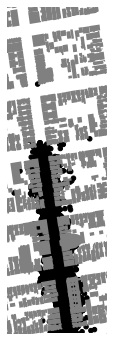

In [233]:
ax = gplt.pointplot(trash, color='black', projection=gplt.crs.AlbersEqualArea())
gplt.polyplot(sel, projection=gplt.crs.AlbersEqualArea(), facecolor='gray', 
              linewidth=0, extent=get_extent(-122.422222, 37.797917, 0.001, 0.004), ax=ax)

/Users/alex/miniconda3/envs/trash-talk/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/alex/miniconda3/envs/trash-talk/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


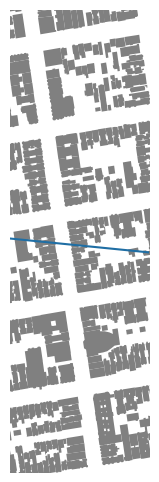

In [235]:
ax = gplt.kdeplot(trash.sample(1000), projection=gplt.crs.AlbersEqualArea())
gplt.polyplot(sel, projection=gplt.crs.AlbersEqualArea(), facecolor='gray', 
              linewidth=0, extent=get_extent(-122.422222, 37.797917, 0.001, 0.004), ax=ax)

In [256]:
trash_selected = select(trash, -122.422222, 37.797917, 0.001, 0.004)

In [258]:
len(trash), len(trash_selected)

(17386, 14178)

/Users/alex/miniconda3/envs/trash-talk/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/alex/miniconda3/envs/trash-talk/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


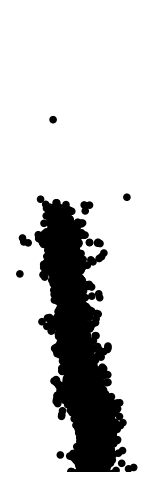

In [240]:
ax = gplt.pointplot(trash, color='black', projection=gplt.crs.AlbersEqualArea())
gplt.kdeplot(trash.sample(1000), 
             extent=get_extent(-122.422222, 37.797917, 0.001, 0.004),
             projection=gplt.crs.AlbersEqualArea(),
             ax=ax)

In [282]:
from shapely.geometry import MultiPoint

In [295]:
cx, cy = MultiPoint(trash_selected.geometry.values).centroid.xy
cx, cy = cx[0], cy[0]

/Users/alex/miniconda3/envs/trash-talk/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/alex/miniconda3/envs/trash-talk/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/alex/miniconda3/envs/trash-talk/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) 

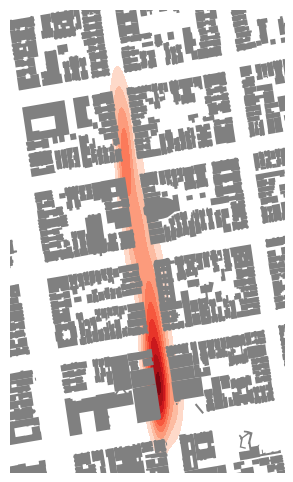

In [317]:
ax = gplt.kdeplot(trash_selected.sample(1000), 
                  projection=gplt.crs.AlbersEqualArea(), 
                  shade=True, shade_lowest=False,
                  extent=get_extent(cx, cy, 0.002, 0.003),
                  cmap="Reds"
                 )
# gplt.pointplot(trash_selected.sample(100), 
#                linewidth=0.5, edgecolor='lightgray', color='None',
#                projection=gplt.crs.AlbersEqualArea(), ax=ax)
gplt.polyplot(sel, projection=gplt.crs.AlbersEqualArea(), facecolor='gray', 
              linewidth=0, ax=ax,
              extent=get_extent(cx, cy, 0.002, 0.003))

* The last missing piece: [Census 2010 block data](https://data.sfgov.org/Geographic-Locations-and-Boundaries/Census-2010-Blocks-for-San-Francisco/2uzy-uv2r).

In [321]:
!cp "/Users/alex/Downloads/Census 2010_ Blocks for San Francisco.geojson" "../data/sf-census-blocks.geojson"